In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.3', '2.2.3', '0.13.2', '3.10.1')

# Load the data

In [3]:
df =pd.read_csv('data/Cars.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
#Check the statistical data 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check data type of our input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# check column names 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Exploratory Data Analysis and Preprocessing

In [9]:
# Drop the 'torque' column
df = df.drop(columns=['torque'])

In [10]:
# Check the distribution of 'fuel' type
print(df['fuel'].value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


## 2.1 Univariate Analysis
### Single Variable Exploratory Data Analysis

## Count Plot

<Axes: xlabel='fuel', ylabel='count'>

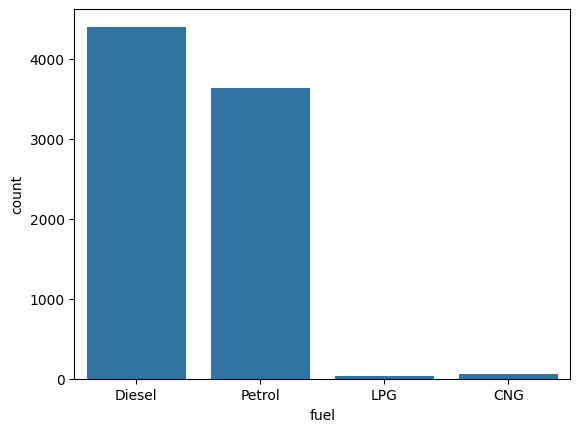

In [11]:
# Let's see how many types of fuel there are 
sns.countplot(data=df, x='fuel')

## Distribution plot

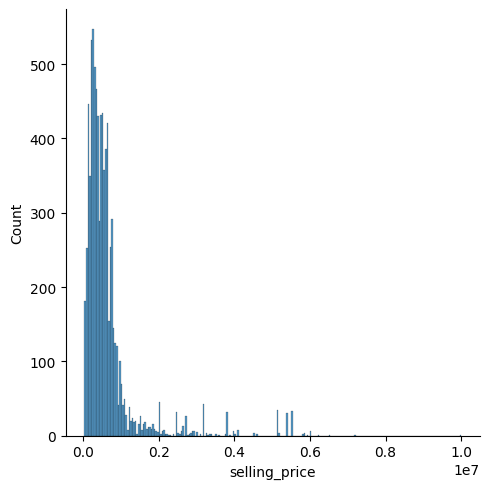

In [12]:
# distribution plot for 'selling price'A2__Predicting_Car_Price.pdf

sns.displot(data = df, x = 'selling_price')

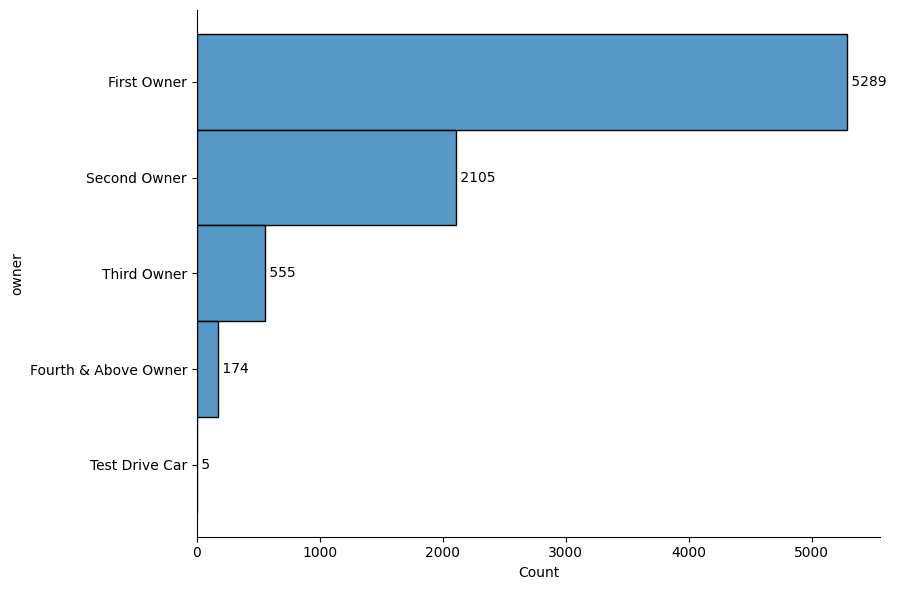

In [13]:
# distribution of types of owner
# making a distribution plot with horizontal bars
sns_plot = sns.displot(data =df, y= 'owner',height =6, aspect= 1.5)

# add count annotations to each bar
for container in sns_plot.ax.containers:
    sns_plot.ax.bar_label(container, fmt = ' %d ', label_type='edge') # format as an integer

In [14]:
# removing all rows with CNG and LPG 
df = df.drop(df[df['fuel'].isin(['LPG','CNG'])].index)
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

In [15]:
# Remove 'kmpl' and convert to float in mileage column
df['mileage'] = df['mileage'].str.split(' ').str[0]  # extract numeric part
df ['mileage'] = df['mileage'].astype (float)   # convert to float

In [16]:
# Remove 'CC' and convert to float in enging column
df['engine']=df['engine'].str.split(' ').str[0] #extract numeric part
df['engine'] = df['engine'].astype(float)     # convert to float


In [17]:
# Remove 'bhp' and convert to float in max_power column
df['max_power']=df['max_power'].str.split(' ').str[0] #extract numeric part
df['max_power'] = df['max_power'].astype(float)     # convert to float

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [19]:
# extract only the first word in the 'name' column
df['name'] = df ['name'].str.split(' ').str[0]

In [20]:
# rename 'name' column to 'brand'
df.rename(columns={'name':'brand'},inplace = True)

## Mapping (for the feature owner, map first owner to 1, ..... Test Drive Car to 5)

In [21]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].map(owner_mapping)

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### 2.2 Multivariate Analysis

#### Multiple variable explortary data analysis

#### Bar Plot (Mean Selling Price per Owner)

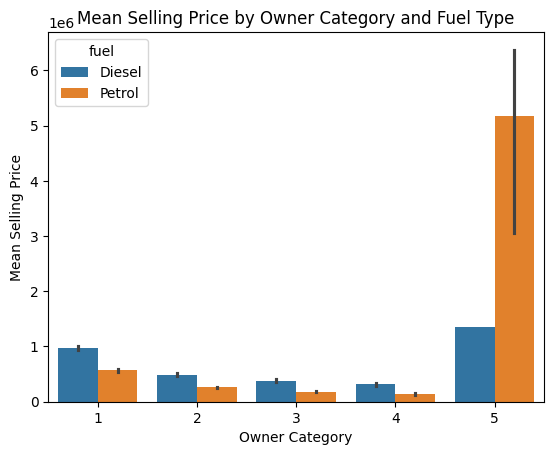

In [22]:
sns.barplot(x='owner', y='selling_price', hue='fuel', data=df, estimator='mean')
plt.xlabel("Owner Category")
plt.ylabel("Mean Selling Price")
plt.title("Mean Selling Price by Owner Category and Fuel Type")
plt.show()

### Key Insights
1.	Most Expensive Category:
*	Test drive cars (Owner Category 5) have the highest mean selling prices, especially for petrol cars.
2.	Depreciation with Ownership:
*	Selling price decreases with the number of previous owners, regardless of fuel type.
3.	Diesel Cars Are Generally More Expensive:
*	Except for test drive cars, Diesel vehicles consistently have higher mean selling prices across ownership categories.

In [23]:
# Based on our barplot analysis, Test Drive Cars are ridiculously expensive. 
# therefore we will delete all samples related to it 

# Filter out rows where the owner column is 5 (Test Drive Car)
df = df.drop(df[df['owner'] == 5].index)       # drop is a method therefore start with ( )
df.head()


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [24]:
df['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling price of cars.  It's also for checking whether certain features are too correlated.

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [25]:
from sklearn.preprocessing import LabelEncoder       # pip install scikit-learn

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [26]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique()

array([1, 0])

In [28]:
#Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Automatic': 0, 'Manual': 1}


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

df["seller_type"].unique()

array([1, 0, 2])

In [30]:
#Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}


In [31]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


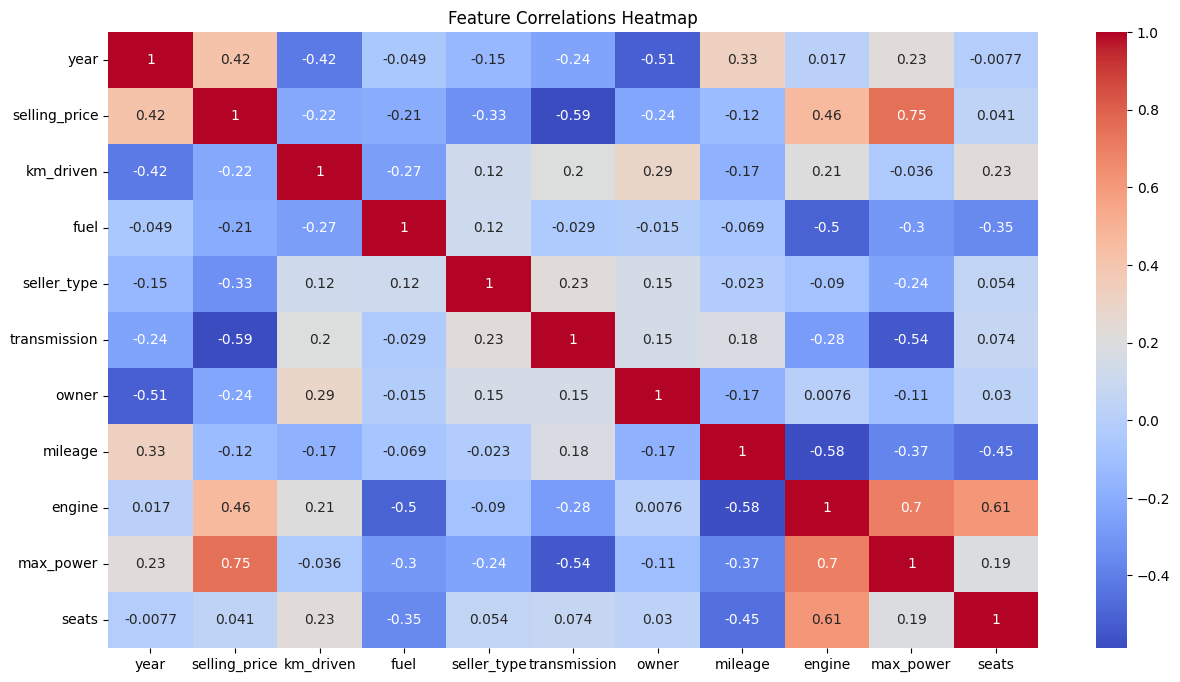

In [32]:
# Create a copy of the DataFrame and drop non-numeric columns
cars_price_temp = df.copy()  # Ensure you're copying the correct DataFrame name
cars_price_temp.drop(['brand'], axis='columns', inplace=True)  # Drop non-numeric columns like 'brand'

# Plot the heatmap for correlations
plt.figure(figsize=(15, 8))  # Set figure size
sns.heatmap(cars_price_temp.corr(), annot=True, cmap="coolwarm")  # Plot the correlation heatmap
plt.title("Feature Correlations Heatmap")  # Add a title
plt.show()  # Display the plot

In [33]:
df.reset_index(inplace=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [35]:
df.columns

Index(['index', 'brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

In [36]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
original_df = df.copy()
df = one_hot_transform(brand_ohe, df, 'brand')

In [37]:
brand_ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [38]:
df["selling_price"].isna().sum()

np.int64(0)

In [39]:
df.columns


Index(['index', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

### Feature Selection

In [40]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_features = ["max_power","year","fuel"] + brand_cats
x = df[selected_features]

# Using qcut to turn selling price into a categorical label
y, k_range = pd.qcut(df["selling_price"], q=4,labels = [0,1,2,3],retbins=True)

In [41]:
selected_features

['max_power',
 'year',
 'fuel',
 'Ashok',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [42]:
# Showing the range of each category in y
k_range = {0:f"{k_range[0]} - {k_range[1]}",
     1:f"{k_range[1]} - {k_range[2]}",
     2:f"{k_range[2]} - {k_range[3]}",
     3:f"{k_range[3]} - {k_range[4]}"}
k_range

{0: '29999.0 - 260000.0',
 1: '260000.0 - 450000.0',
 2: '450000.0 - 680000.0',
 3: '680000.0 - 10000000.0'}

In [43]:
y.isna().sum()

np.int64(0)

In [44]:
y.value_counts()

selling_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

In [45]:
## This log transformation code no longer required


# Apply log transformation to the 'selling_price' column and assign it to y
#df['selling_price'] = np.log(df['selling_price'])  # Update the DataFrame column
#y = df['selling_price']  # Assign the updated column to y for your model

# Verify the values
#print(df.head())  # Check the DataFrame
# print(y.head())   # Check the y variable


#### Train/ Test split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

# 5. Preprocessing

In [46]:
# Check for null values
X_train[selected_features].isna().sum()

max_power        169
year               0
fuel               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [48]:
X_test[selected_features].isna().sum()

max_power        39
year              0
fuel              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [49]:
y_train.isna().sum()

np.int64(0)

In [50]:
y_test.isna().sum()

np.int64(0)

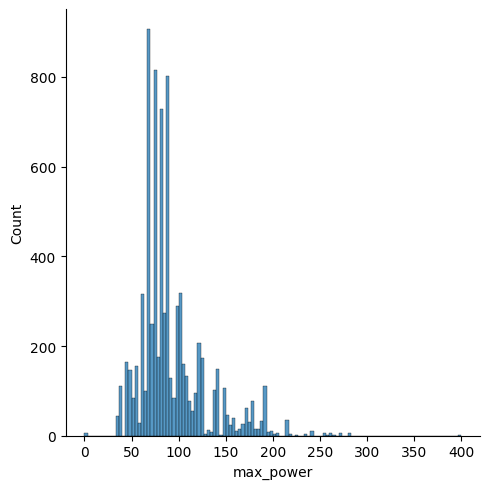

In [51]:
sns.displot(data=df, x='max_power')

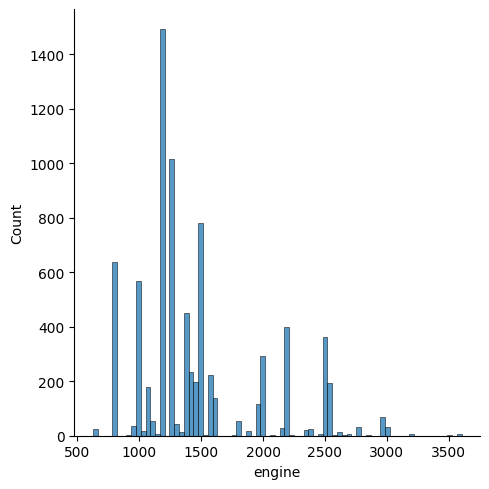

In [52]:
sns.displot(data=df, x='engine')

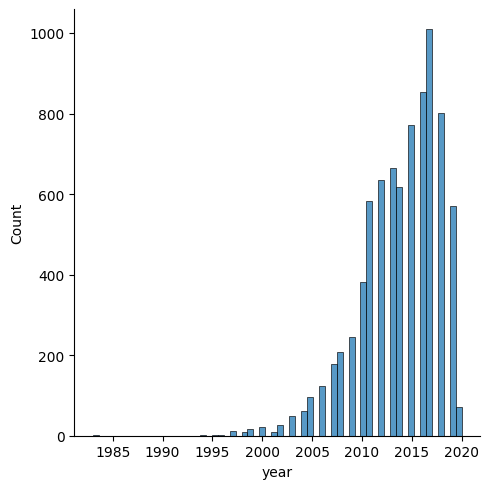

In [53]:
sns.displot(data=df, x='year')

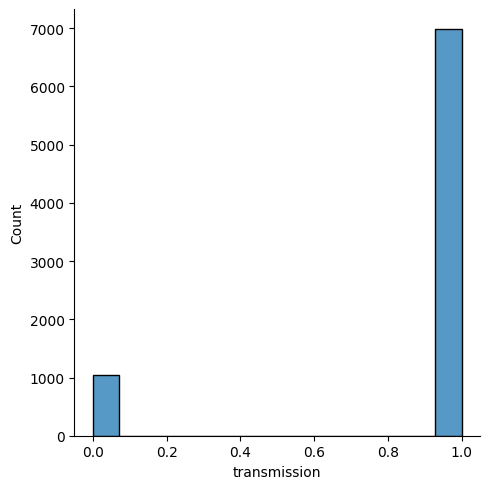

In [54]:
sns.displot(data=df, x='transmission')

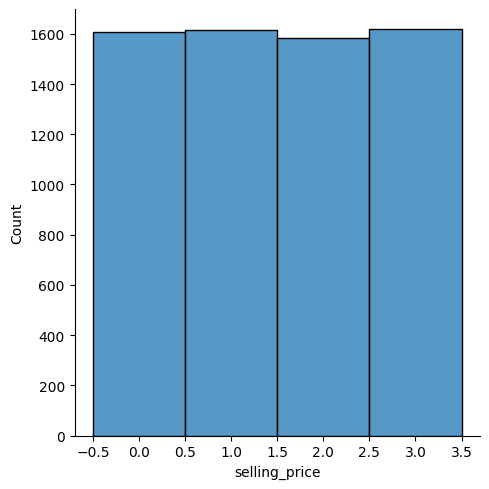

In [55]:
sns.displot(y_train)

In [56]:
# Saving values to put into model file
fuel_default = X_train['fuel'].mode()
year_default = X_train['year'].mode()
max_default = X_train['max_power'].median()

In [57]:
# Training set

# Filling the other columns
X_train['fuel'].fillna(X_train['fuel'].mode(), inplace=True)
X_train['year'].fillna(X_train['year'].mode(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [58]:
# Testing set
X_test['fuel'].fillna(X_test['fuel'].mode(), inplace=True)
X_test['year'].fillna(X_test['year'].mode(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [59]:
# Since y is now a categorical value, we find the ratio of y train and y test to replace missing values 
# maintaining the ratio
ratio = y_train.value_counts(normalize=True,sort=False)
print(ratio)

selling_price
0    0.250234
1    0.251324
2    0.246496
3    0.251946
Name: proportion, dtype: float64


In [60]:
# number of missing values in y train, to replace by maintaining ratio
missing = y_train.isna().sum()

num3 = int(np.round(ratio[3] * missing))
num2 = int(np.round(ratio[2] * missing))
num1 = int(np.round(ratio[1] * missing))
num0 = int(np.round(ratio[0] * missing))

In [61]:
# Since there no missing values, we don't need to fill
# If there were missing values, uncomment the lines below

# y_train.fillna(3.0, limit = num3, inplace=True)
# y_train.fillna(2.0, limit = num2, inplace=True)
# y_train.fillna(1.0, limit = num1, inplace=True)
# y_train.fillna(0.0, limit = num0, inplace=True)

In [62]:
# Repeating the same steps for y test
ratio = y_test.value_counts(normalize=True,sort=False)
print(ratio)

missing = y_test.isna().sum()

num3 = int(np.round(ratio[3] * missing))
num2 = int(np.round(ratio[2] * missing))
num1 = int(np.round(ratio[1] * missing))
num0 = int(np.round(ratio[0] * missing))

print(num3,num2,num1, num0)

# y_train.fillna(3.0, limit = num3, inplace=True)
# y_train.fillna(2.0, limit = num2, inplace=True)
# y_train.fillna(1.0, limit = num1, inplace=True)
# y_train.fillna(0.0, limit = num0, inplace=True)

selling_price
0    0.275841
1    0.267746
2    0.224159
3    0.232254
Name: proportion, dtype: float64
0 0 0 0


In [63]:
# Checking values
X_train[selected_features].isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [64]:
X_test[selected_features].isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [65]:
y_train.isna().sum()

np.int64(0)

In [66]:
y_test.isna().sum()

np.int64(0)

# Checking outliers

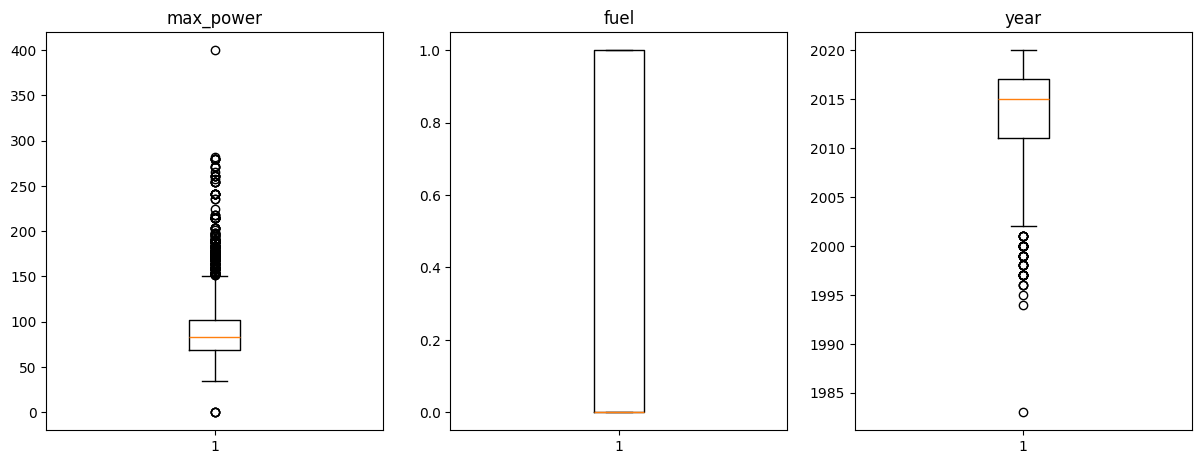

In [67]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'fuel':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [68]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [69]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 476
Percent of data that is outlier: 7.41%

---------------year---------------

Number of outliers: 60
Percent of data that is outlier: 0.93%

---------------Audi---------------

Number of outliers: 27
Percent of data that is outlier: 0.42%

---------------BMW---------------

Number of outliers: 103
Percent of data that is outlier: 1.6%

---------------Chevrolet---------------

Number of outliers: 181
Percent of data that is outlier: 2.82%

---------------Daewoo---------------

Number of outliers: 3
Percent of data that is outlier: 0.05%

---------------Datsun---------------

Number of outliers: 55
Percent of data that is outlier: 0.86%

---------------Fiat---------------

Number of outliers: 36
Percent of data that is outlier: 0.56%

---------------Force---------------

Number of outliers: 5
Percent of data that is outlier: 0.08%

---------------Ford---------------

Number of outliers: 328
Percent of data that is outlier: 5

In [70]:
y_train.values

[1, 3, 1, 3, 0, ..., 0, 2, 1, 3, 1]
Length: 6422
Categories (4, int64): [0 < 1 < 2 < 3]

# Scaling

In [71]:
import pickle

In [72]:
from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
scaler = StandardScaler()
cont_features = ["max_power","year"]
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features]  = scaler.transform(X_test[cont_features])
with open  ('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [73]:
# Adding intercepts to include a bias in our theta
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [74]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [75]:
X_train[0]

array([ 1.        , -1.03087045, -0.20503496,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [76]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [77]:
X_train

array([[ 1.        , -1.03087045, -0.20503496, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.09058817,  0.78853945, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.16095767, -0.70182216, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.69856073,  1.53372026, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.55778022,  0.04335865, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.67051771,  0.54014585, ...,  0.        ,
         0.        ,  0.        ]], shape=(6422, 35))

In [78]:
Y_train_encoded

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(6422, 4))

In [79]:
X_train[0]

array([ 1.        , -1.03087045, -0.20503496,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# Modeling

In [80]:
import mlflow
import os
import mlflow.sklearn

In [81]:

# Set MLflow Tracking Server
# mlflow.set_tracking_uri("http://localhost:5000")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

mlflow.set_tracking_uri(uri = "https://mlflow.ml.brain.cs.ait.ac.th")

# Set User/Author Info
os.environ["LOGNAME"] = "st124957"   # Fixed the assignment

# Set Experiment Name
#mlflow.set_experiment("ANT-A3-car-price-prediction")
mlflow.set_experiment(experiment_name="st124957-a3")

#print("MLflow experiment set successfully!")

<Experiment: artifact_location='mlflow-artifacts:/684315151779279618', creation_time=1742217020374, experiment_id='684315151779279618', last_update_time=1742217020374, lifecycle_stage='active', name='st124957-a3', tags={}>

In [82]:
class LogisticRegression:
    
    def __init__(self,regularization, k, n, method, alpha = 0.001,theta_init='zeros', max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.method = method
        # self.pre = []  # Initialize as empty lists
        # self.re = []
        # self.f1 = []
        # self.ratio = []
        # self.support = []
    
    def fit(self, X, Y):
        # self.W = np.random.rand(self.n, self.k)
        if self.theta_init == 'zeros':
            self.W = np.zeros((self.n, self.k))
        elif self.theta_init == 'xavier':
            m = X_train.shape[0]
            # calculate the range for the weights
            lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
            # randomly pick weights within this range
            # generate random numbers
            numbers = np.random.rand((self.n, self.k))
            self.W = lower + numbers * (upper - lower)
            
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            # batch_size = 32
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m + self.regularization(self.W)
        error = h - Y
        grad = self.softmax_grad(X, error)  + self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Accuracy function of the model
    def accuracy(self, X, Y):
        # accuracy = correct pred / total pred
        yhat = self.predict(X)
        return np.sum(yhat == Y)/ yhat.shape[0]
    
    def confusion_matrix(self, ytrue, ypred):
        # convert arrays to lists to allow easy data manipulation
        y_p = ypred.tolist()
        y_a = ytrue.tolist()

        # initialize empty confusion matrix
        cm = [[0 for x in range(self.k)] for y in range(self.k)]

        # ensure numnber of prediction and actual values are the same
        assert len(y_p) == len(y_a)

        # fill the confusion matrix
        for i in range (len(y_p)):
            for j in range (self.k):
                for l in range(self.k):
                    if y_a[i] == j and y_p[i] == l:
                        cm[j][l] += 1
        
        # true positive list (when cm[i][i])
        self.tp = [0 for x in range(self.k)]
        for i in range (self.k):
            self.tp[i] = cm[i][i]

        # true negative list is no required for precision and recall
        # false negative list
        self.fn = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fn[i] += cm[i][j]
        
        # false positive list
        self.fp = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fp[i] += cm[j][i]
    
    def precision(self):
        self.pre = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.pre[i] = 0
            else:
                self.pre[i] = self.tp[i] / (self.tp[i] + self.fp[i])
        return self.pre
    
    def recall(self):
        self.re = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.re[i] = 0
            else:
                self.re[i] = self.tp[i] / (self.tp[i] + self.fn[i])
        return self.re
    
    def f1_score(self):
        self.f1 = [0 for x in range (self.k)]
        for i in range (self.k):
            if self.pre[i] == 0 and self.re[i] == 0:
                self.f1[i] = 0
            else:
                self.f1[i] = (2 * self.pre[i] * self.re[i]) / (self.pre[i] + self.re[i])
        return self.f1
    
    def macro_precision(self):
        return sum(self.pre) / len(self.pre)
    
    def macro_recall(self):
        return sum(self.re) / len(self.re)
    
    def macro_f1(self):
        return sum(self.f1) / len(self.f1)
    
    def weighted_precision(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.pre[i]
        return denominator / self.Y_num
    
    def weighted_recall(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.re[i]
        return denominator / self.Y_num
    
    def weighted_f1(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.f1[i]
        return denominator / self.Y_num
    
    def classification_report_scratch(self, X, Y):
        # Method to show classification report similar to sklearn
                    
        # Call confusion matrix method to set TP,TN,FP,FN
        self.confusion_matrix(Y, self.predict(X))
        print(self.tp, self.fp, self.fn)

        # Calculate ratio of y for weighted calculations
        self.ratio = Y.value_counts(normalize=True, sort=False)

        # Support for classification report
        self.support = Y.value_counts(normalize=False, sort=False)

        # Total number of samples
        self.Y_num = Y.shape[0]

        # Call all methods to store values
        self.precision()
        self.recall()
        self.f1_score()
        macro_precision = self.macro_precision()  # Call these methods
        macro_recall = self.macro_recall()        # to calculate their values
        macro_f1 = self.macro_f1()                # before using them
    

        print("=========Classification report scratch=======")
        print("\t\tprecision \trecall \tf1 \tsupport\n")
        for i in range(self.k):
            print(f"{i} \t\t{self.pre[i]:.2f} \t{self.re[i]:.2f} \t{self.f1[i]:.2f} \t{self.support[i]}")
        print(f"\naccuracy \t\t\t{self.accuracy(X, Y):.2f} \t{Y.shape[0]}")
        print(f"macro avg \t{macro_precision:.2f} \t{macro_recall:.2f} \t{macro_f1:.2f} \t{Y.shape[0]}")
        print(f"weighted avg \t{self.weighted_precision():.2f} \t{self.weighted_recall():.2f} \t{self.weighted_f1():.2f} \t{Y.shape[0]}")

    def _coef(self):
        return self.W[1:]
    
    def feature_importance(self):
        feature_names = selected_features
        importance_values = np.mean(np.abs(model._coef()[0:34]), axis=1)

        # Create a bar chart for feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,np.max(self._coef())])  # Set the x-axis limits
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()

In [83]:
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0 # returning zero because normal just means using linear regression with no regularization
        
    def derivation(self, theta):
        return 0 # returning zero because normal just means using linear regression with no regularization

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')

class Lasso(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class ElasticNet(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')

In [84]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [98]:
from sklearn.preprocessing import PolynomialFeatures
#iterating through all possible parameters
polynomials = [2,3,"no"]
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","minibatch","sto"]
alphas = [0.01,0.001,0.0001]


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for alpha in alphas:
                if polynomial == "no":
                    X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                else:
                    # Apply polynomial feature transformation
                    poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.transform(X_test)                
                # #######

                k_num = k
                n = X_train_poly.shape[1]
                params = {"k":k_num, "n":n, "method": method,"alpha": alpha, "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-reg-{reg}", nested=True)
                mlflow.log_params(params=params)

                print("="*5, polynomial, "="*5)
                print("="*5, reg, "="*5)                        
                print("="*5, method, "="*5)  
                print("="*5, alpha, "="*5)
                                      

                
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                model = type_of_regression(**params)  
                model.fit(X_train_poly, Y_train_encoded)
                yhat = model.predict(X_train_poly)

                model.classification_report_scratch(X_train_poly,y_train)
                acc = model.accuracy(X_train_poly,y_train)
                f1 = model.weighted_f1()

                print("Accuracy: ", acc)
                mlflow.log_metric(key="accuracy", value=acc)

                print("F1 score: ", f1)
                mlflow.log_metric(key="weighted_f1_score", value=f1)

                signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== 2 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198901
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 36.51348567008972
[1607, 0, 0, 0] [4815, 0, 0, 0] [0, 1614, 1583, 1618]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.25 	1.00 	0.40 	1607
1 		0.00 	0.00 	0.00 	1614
2 		0.00 	0.00 	0.00 	1583
3 		0.00 	0.00 	0.00 	1618

accuracy 			0.25 	6422
macro avg 	0.06 	0.25 	0.10 	6422
weighted avg 	0.06 	0.25 	0.10 	6422
Accuracy:  0.2502335720959203
F1 score:  0.10016822776389185
🏃 View run method-batch-reg-Ridge at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/684315151779279618/runs/2d6ef8f5c1b8414c84304c5167367273
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/68431